<a href="https://colab.research.google.com/github/eunpro/self/blob/main/ML/%EB%94%A5%EB%9F%AC%EB%8B%9D4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처: https://www.youtube.com/watch?v=2VKrLpostvY&t=373s

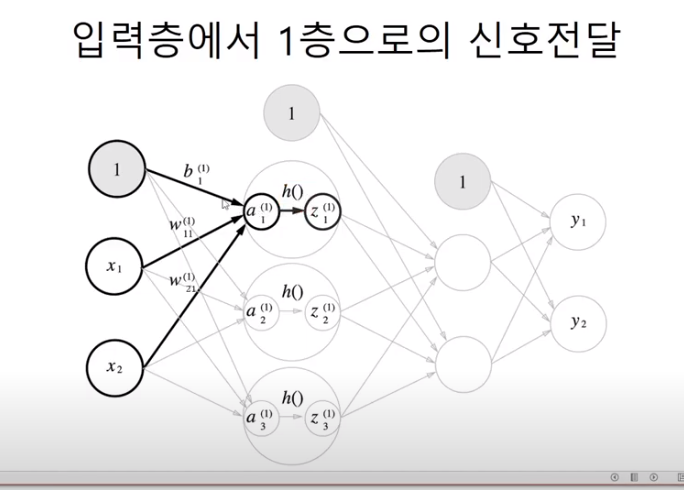

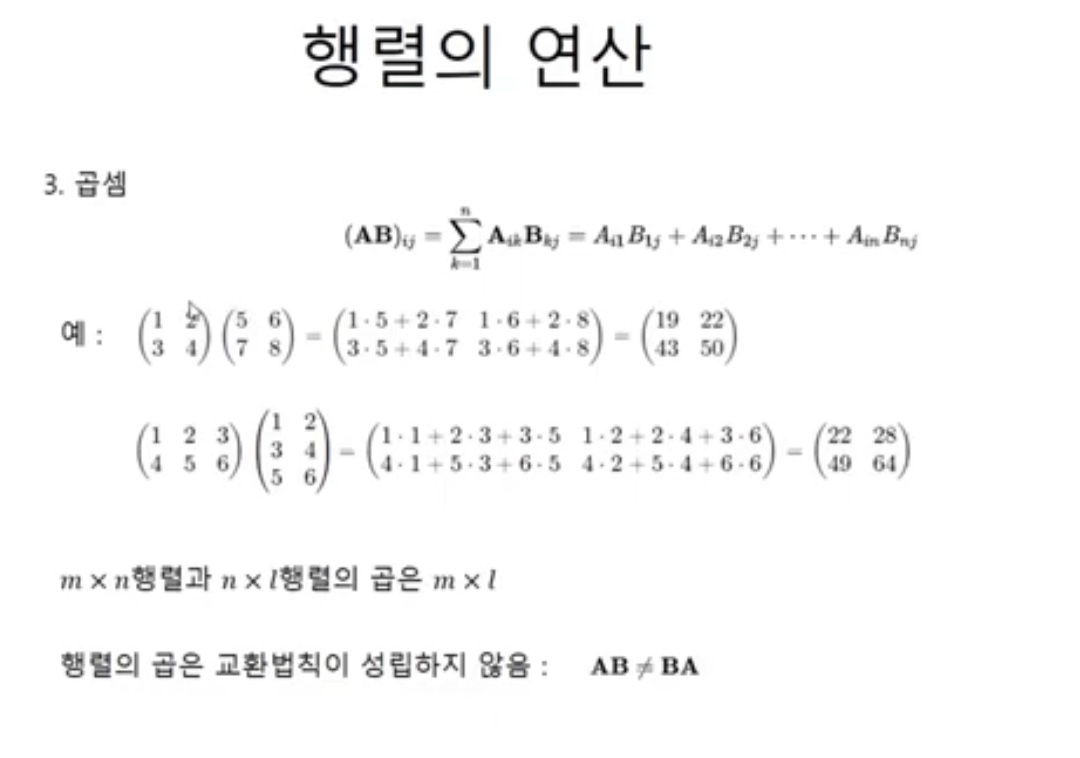

ㄴ 시그모이드 함수로 값을 받아 다음 신경망으로 전달함

softmax함수 : 일반벡터를 확률벡터로 바꿔주는 역할 

In [ ]:
import numpy as np

x = np.array([[1,2], [3,4]])
x

array([[1, 2],
       [3, 4]])

In [ ]:
x[0]

array([1, 2])

In [ ]:
x[1]

array([3, 4])

In [ ]:
y = np.array([[5,6],[7,8]])
y

array([[5, 6],
       [7, 8]])

In [ ]:
x +y

array([[ 6,  8],
       [10, 12]])

In [ ]:
x*y #행렬 같은 위치끼리 인수를 곱함

array([[ 5, 12],
       [21, 32]])

행렬에서 AB≠BA

(2 x 2) 행렬 곱하기 (2 x 3) => (2 x 3)

(3 x 1) 행렬 곱하기 (1 x 4) => (3 x 4)

사이즈가 안맞는 행렬 곱하면 에러

In [ ]:
np.dot(x,y) #행렬곱

array([[19, 22],
       [43, 50]])

In [ ]:
np.dot(y,x) #행렬곱

array([[23, 34],
       [31, 46]])

In [ ]:
A = np.array([[1,2,3],[4,5,6]])
B = np.array([[3,4],[6,7],[10,11]])
B

array([[ 3,  4],
       [ 6,  7],
       [10, 11]])

In [ ]:
np.dot(A,B)

array([[ 45,  51],
       [102, 117]])

In [ ]:
np.dot(B,A)

array([[19, 26, 33],
       [34, 47, 60],
       [54, 75, 96]])

In [ ]:
np.matmul(A,B)

array([[ 45,  51],
       [102, 117]])

In [ ]:
np.matmul(B,A)

array([[19, 26, 33],
       [34, 47, 60],
       [54, 75, 96]])

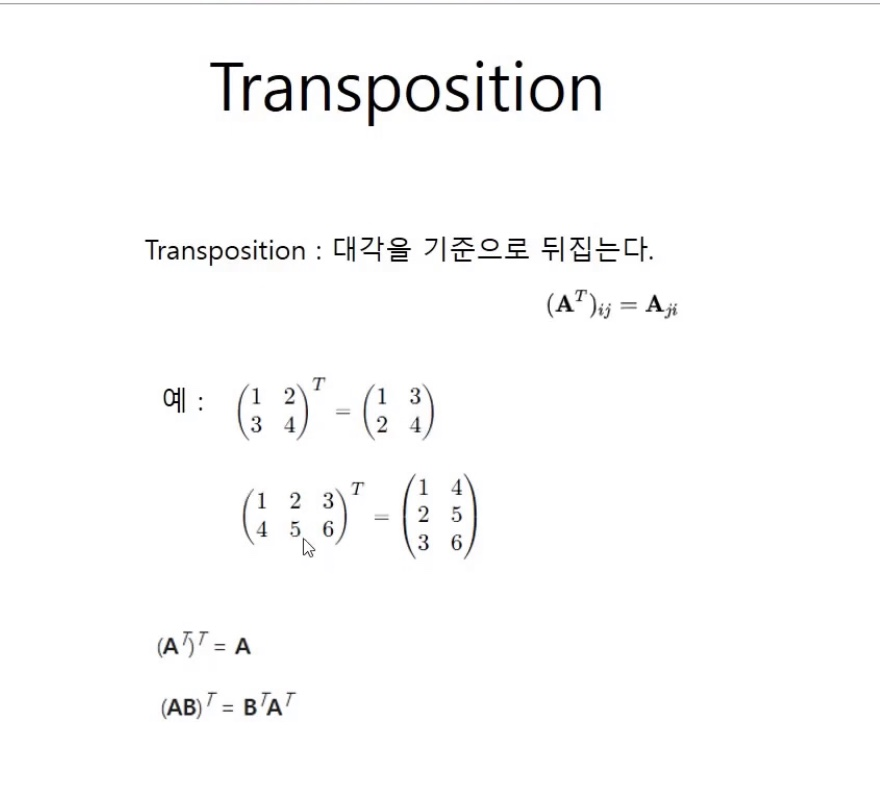

In [ ]:
x

array([[1, 2],
       [3, 4]])

In [ ]:
x.T

array([[1, 3],
       [2, 4]])

In [ ]:
y

array([[5, 6],
       [7, 8]])

In [ ]:
y.T

array([[5, 7],
       [6, 8]])

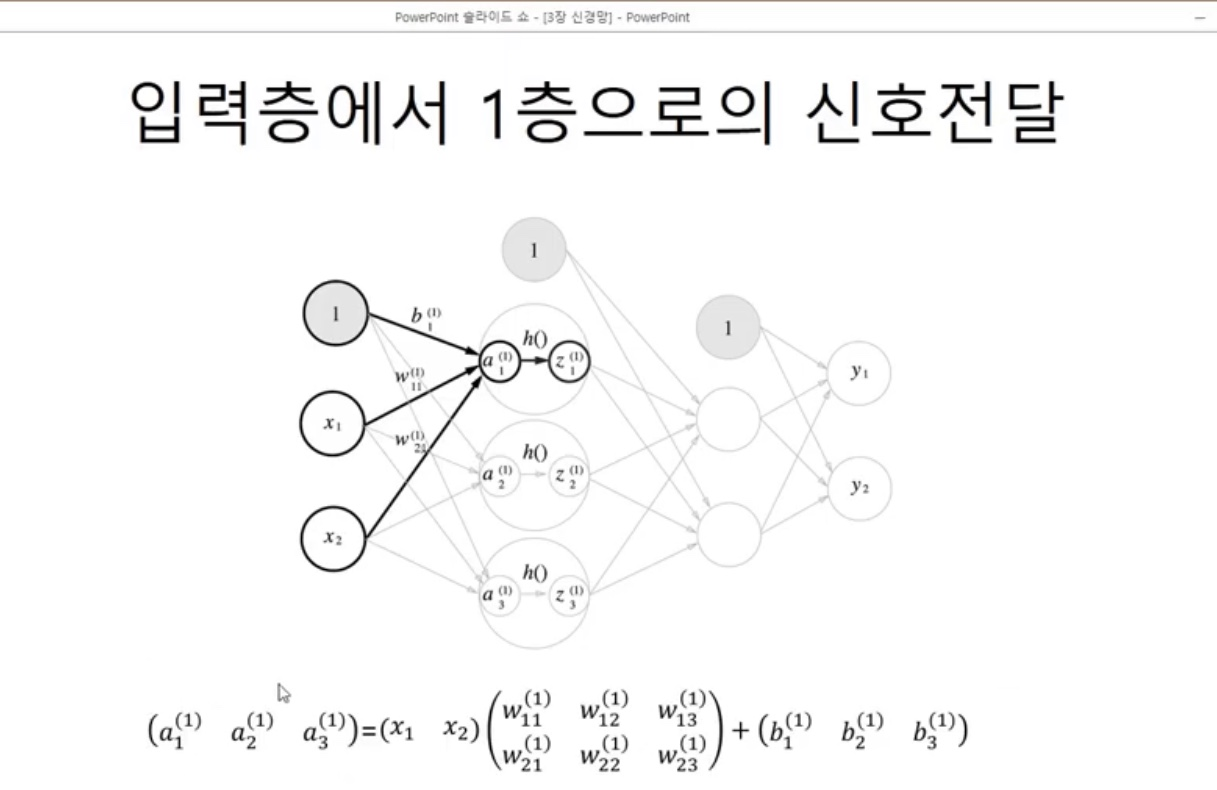

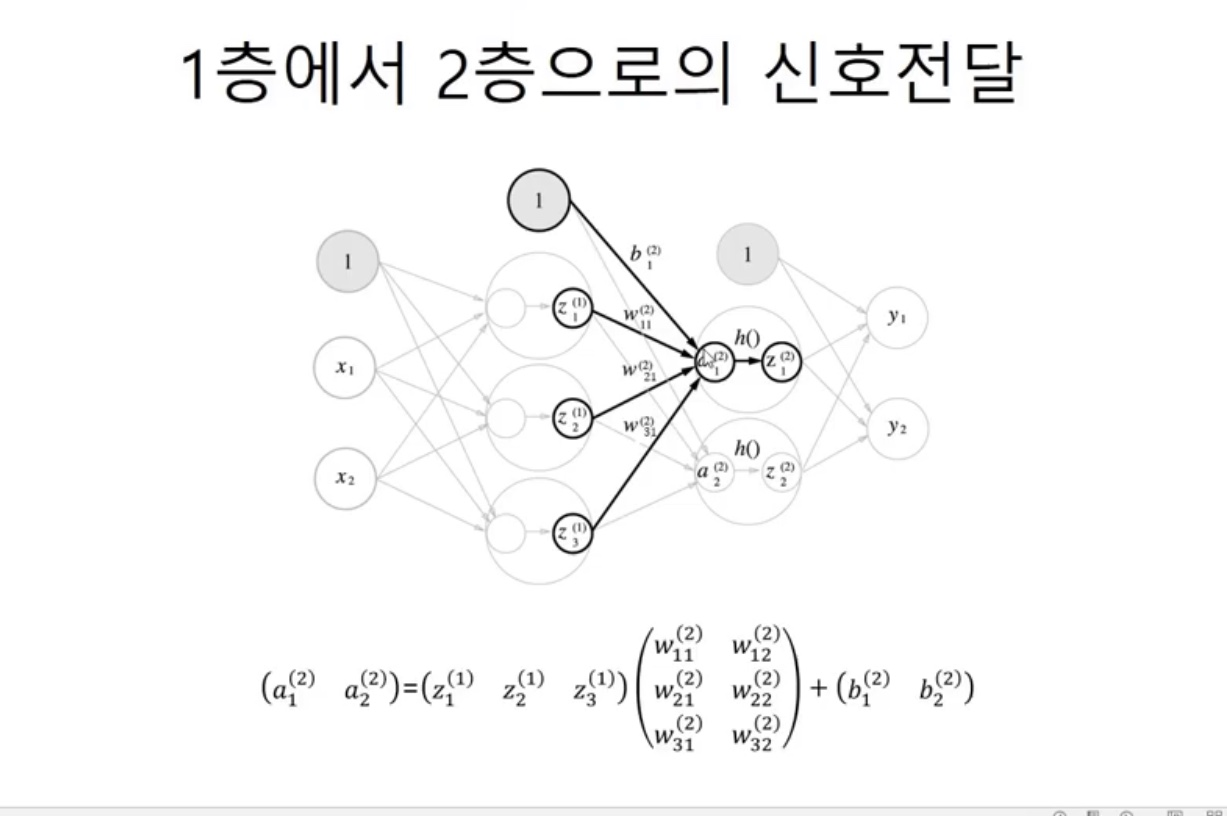

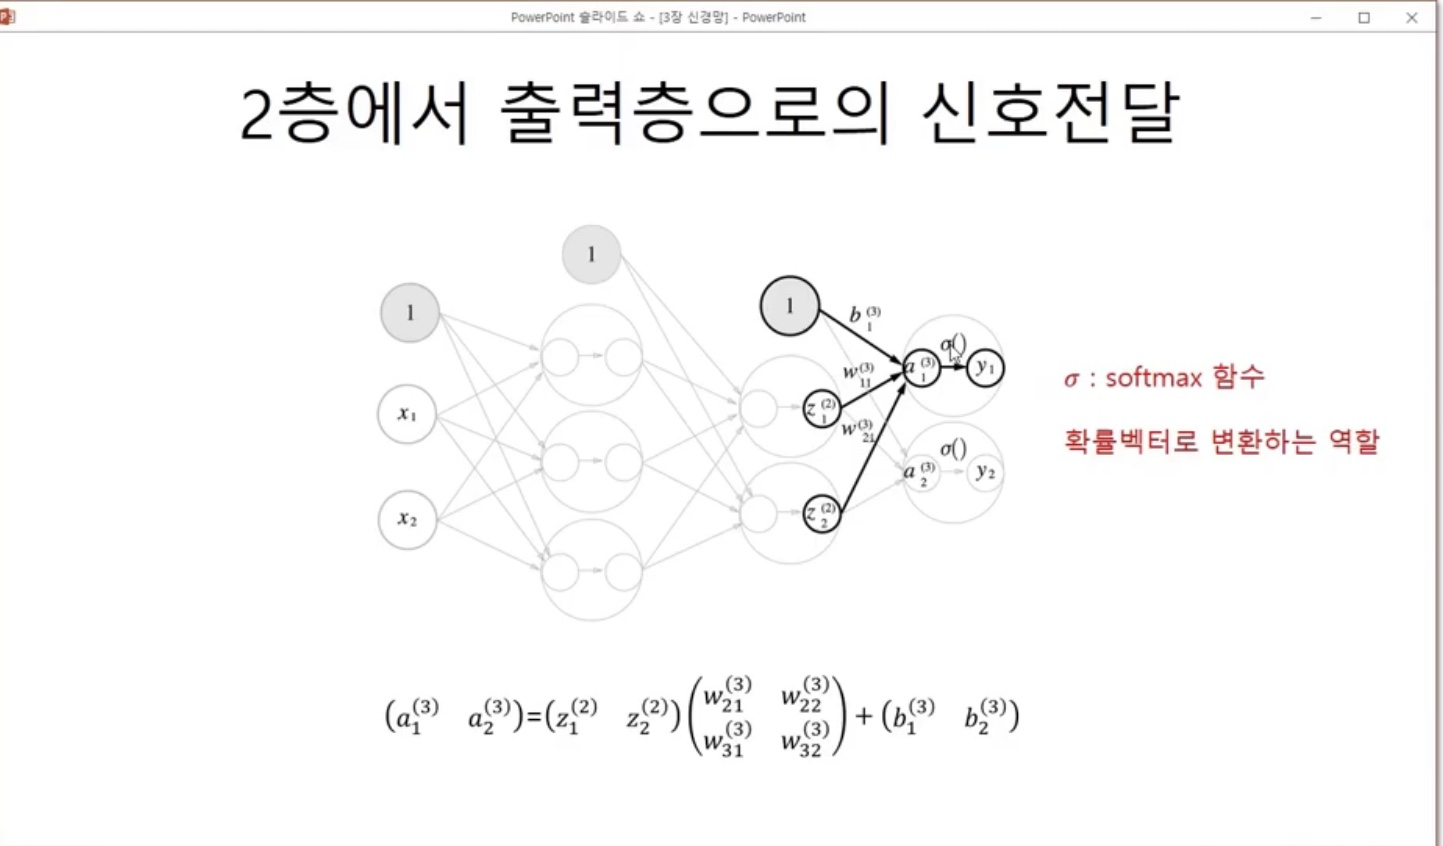

In [ ]:
#89p
#forward.py
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x): #항등함수: 입력값을 그대로 내보냄
    return x

In [ ]:
#신경망은 실행회수 증가할수록 성능 좋아짐
def init_network(): #초기 신경망 정의
    network = {} #빈 사전 정의
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # W1 = Key 지정, value 부여 
    network['b1'] = np.array([0.1,0.2,0.3]) # b1 = Key 지정, value 부여 
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]]) 
    network['b3'] = np.array([0.1,0.2])
    
    return network

In [ ]:
init_network

<function __main__.init_network>

In [ ]:
init_network()

{'W1': array([[0.1, 0.3, 0.5],
        [0.2, 0.4, 0.6]]), 'W2': array([[0.1, 0.4],
        [0.2, 0.5],
        [0.3, 0.6]]), 'W3': array([[0.1, 0.3],
        [0.2, 0.4]]), 'b1': array([0.1, 0.2, 0.3]), 'b2': array([0.1, 0.2]), 'b3': array([0.1, 0.2])}

In [ ]:
#dictionary: key입력하면 value튀어 나옴
def forward(network, x): #x는 초기 입력되는 신호
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    #첫번째 bias벡터, 두번째 bias벡터, 세번째 bias벡터
    
    a1 = np.dot(x,W1)+b1 #np.dot: 행렬곱하기, b1:bias 
    z1 = sigmoid(a1) #시그모이드 함수로 변형
    a2 = np.dot(z1,W2)+b2 #두번째 신경망에 입력
    z2 = sigmoid(a2) #시그모이드 함수로 변형
    a3 = np.dot(z2,W3)+b3 #세번째 신경망에 입력
    y = identity_function(a3) #시그모이드 함수로 변형
    
    return y

network = init_network()
x = np.array([1.0,0.5]) #입력신호로 [1, 0.5] 가 들어옴
y = forward(network, x) #항등함수 => 나중에 항등함수를 softvactor로 변형할 것
print(y)

[0.31682708 0.69627909]


In [ ]:
#89p
#forward.py
#코드정리
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x): #항등함수: 입력값을 그대로 내보냄
    return x

#신경망은 실행회수 증가할수록 성능 좋아짐
def init_network(): #초기 신경망 정의
    network = {} #빈 사전 정의
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]]) # W1 = Key 지정, value 부여 
    network['b1'] = np.array([0.1,0.2,0.3]) # b1 = Key 지정, value 부여 
    network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['W3'] = np.array([[0.1,0.3],[0.2,0.4]]) 
    network['b3'] = np.array([0.1,0.2])
    
    return network

#dictionary: key입력하면 value튀어 나옴
def forward(network, x): #x는 초기 입력되는 신호
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    #첫번째 bias벡터, 두번째 bias벡터, 세번째 bias벡터
    
    a1 = np.dot(x,W1)+b1 #np.dot: 행렬곱하기, b1:bias 
    z1 = sigmoid(a1) #시그모이드 함수로 변형
    a2 = np.dot(z1,W2)+b2 #두번째 신경망에 입력
    z2 = sigmoid(a2) #시그모이드 함수로 변형
    a3 = np.dot(z2,W3)+b3 #세번째 신경망에 입력
    y = identity_function(a3) #시그모이드 함수로 변형
    
    return y

network = init_network()
x = np.array([1.0,0.5]) #입력신호로 [1, 0.5] 가 들어옴
y = forward(network, x) #항등함수 => 나중에 항등함수를 softvactor로 변형할 것
print(y)

[0.31682708 0.69627909]


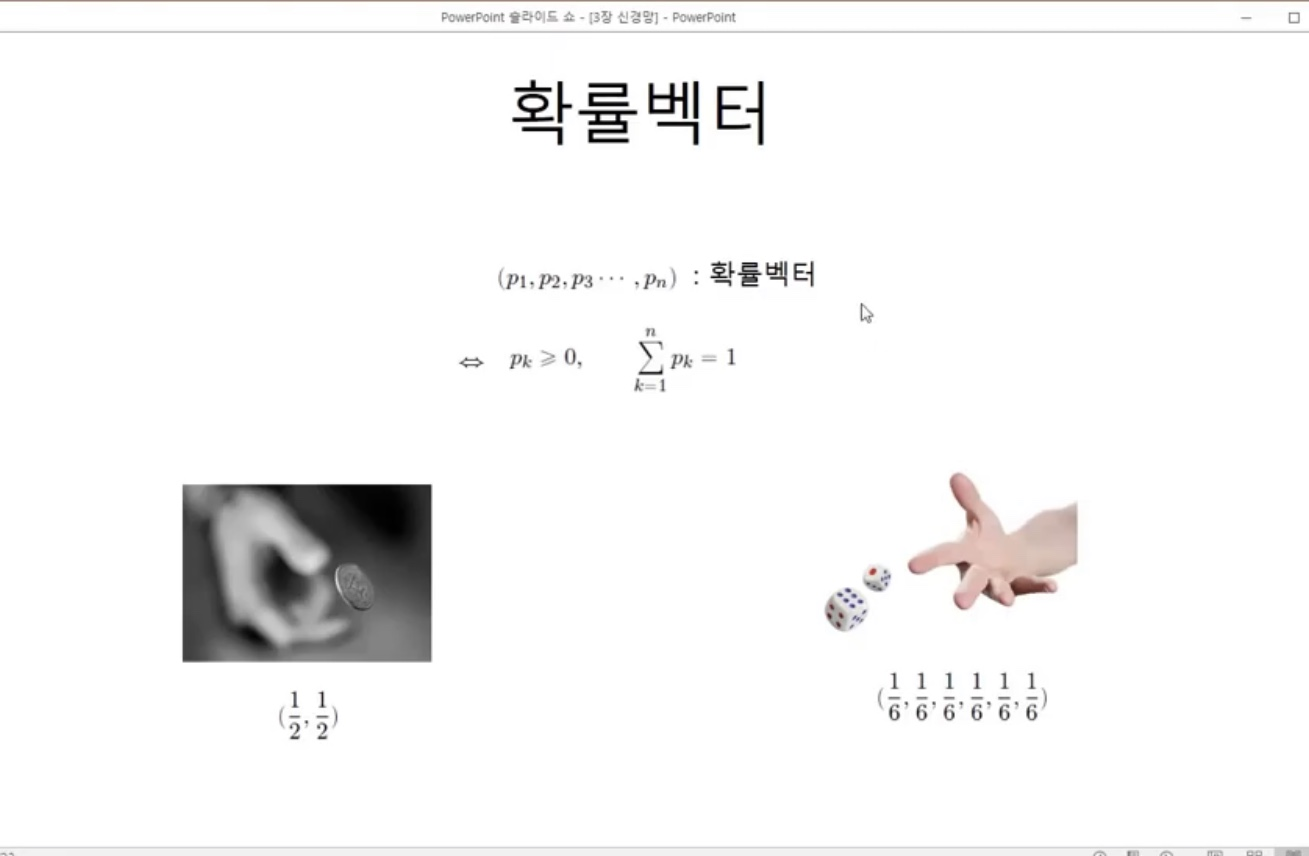

확률벡터 : 

모든 값이 0이상
          
모든 값의 합이 1

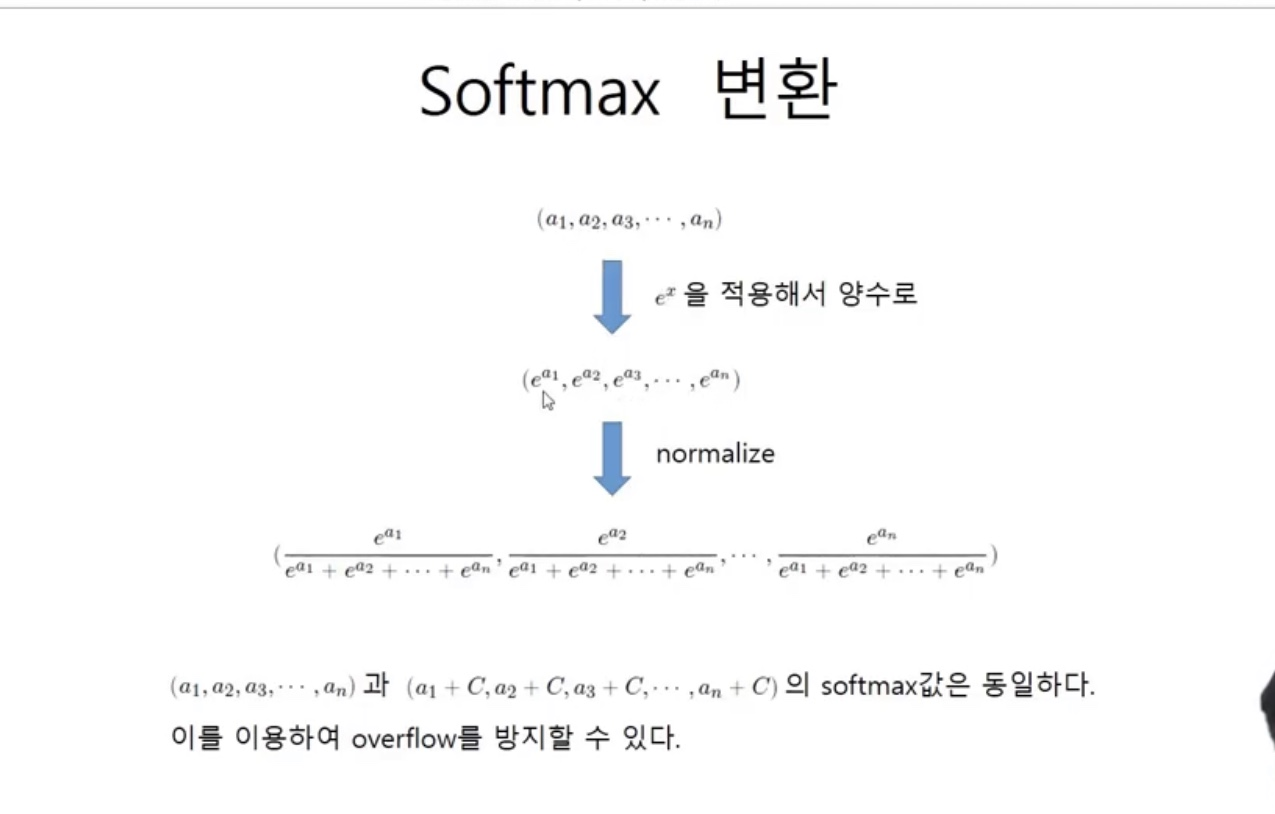

Normalization(정규화)

관계형 데이터베이스의 설계에서 중복을 최소화하게 데이터를 구조화하는 프로세스

모든 데이터 포인트가 동일한 정도의 스케일(중요도)로 반영되도록 해주는 게 정규화(Normalization)의 목표다.

In [ ]:
#overflow
print(np.exp(1))
print(np.exp(10))
print(np.exp(100))
print(np.exp(1000)) #inf: 무한대(infinity) => 숫자가 너무 커서 overflow로 인식

2.718281828459045
22026.465794806718
2.6881171418161356e+43
inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [ ]:
a = np.array([1010, 1000, 990])
np.exp(a)/np.sum(np.exp(a)) 
#숫자가 너무 커져서 처리할 수 없음 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([nan, nan, nan])

In [ ]:
c = np.max(a)
c

1010

In [ ]:
a - c

array([  0, -10, -20])

In [ ]:
np.exp(a-c)/np.sum(np.exp(a-c)) 

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [ ]:
np.exp(c-a)/np.sum(np.exp(c-a)) 

array([2.06106005e-09, 4.53978686e-05, 9.99954600e-01])

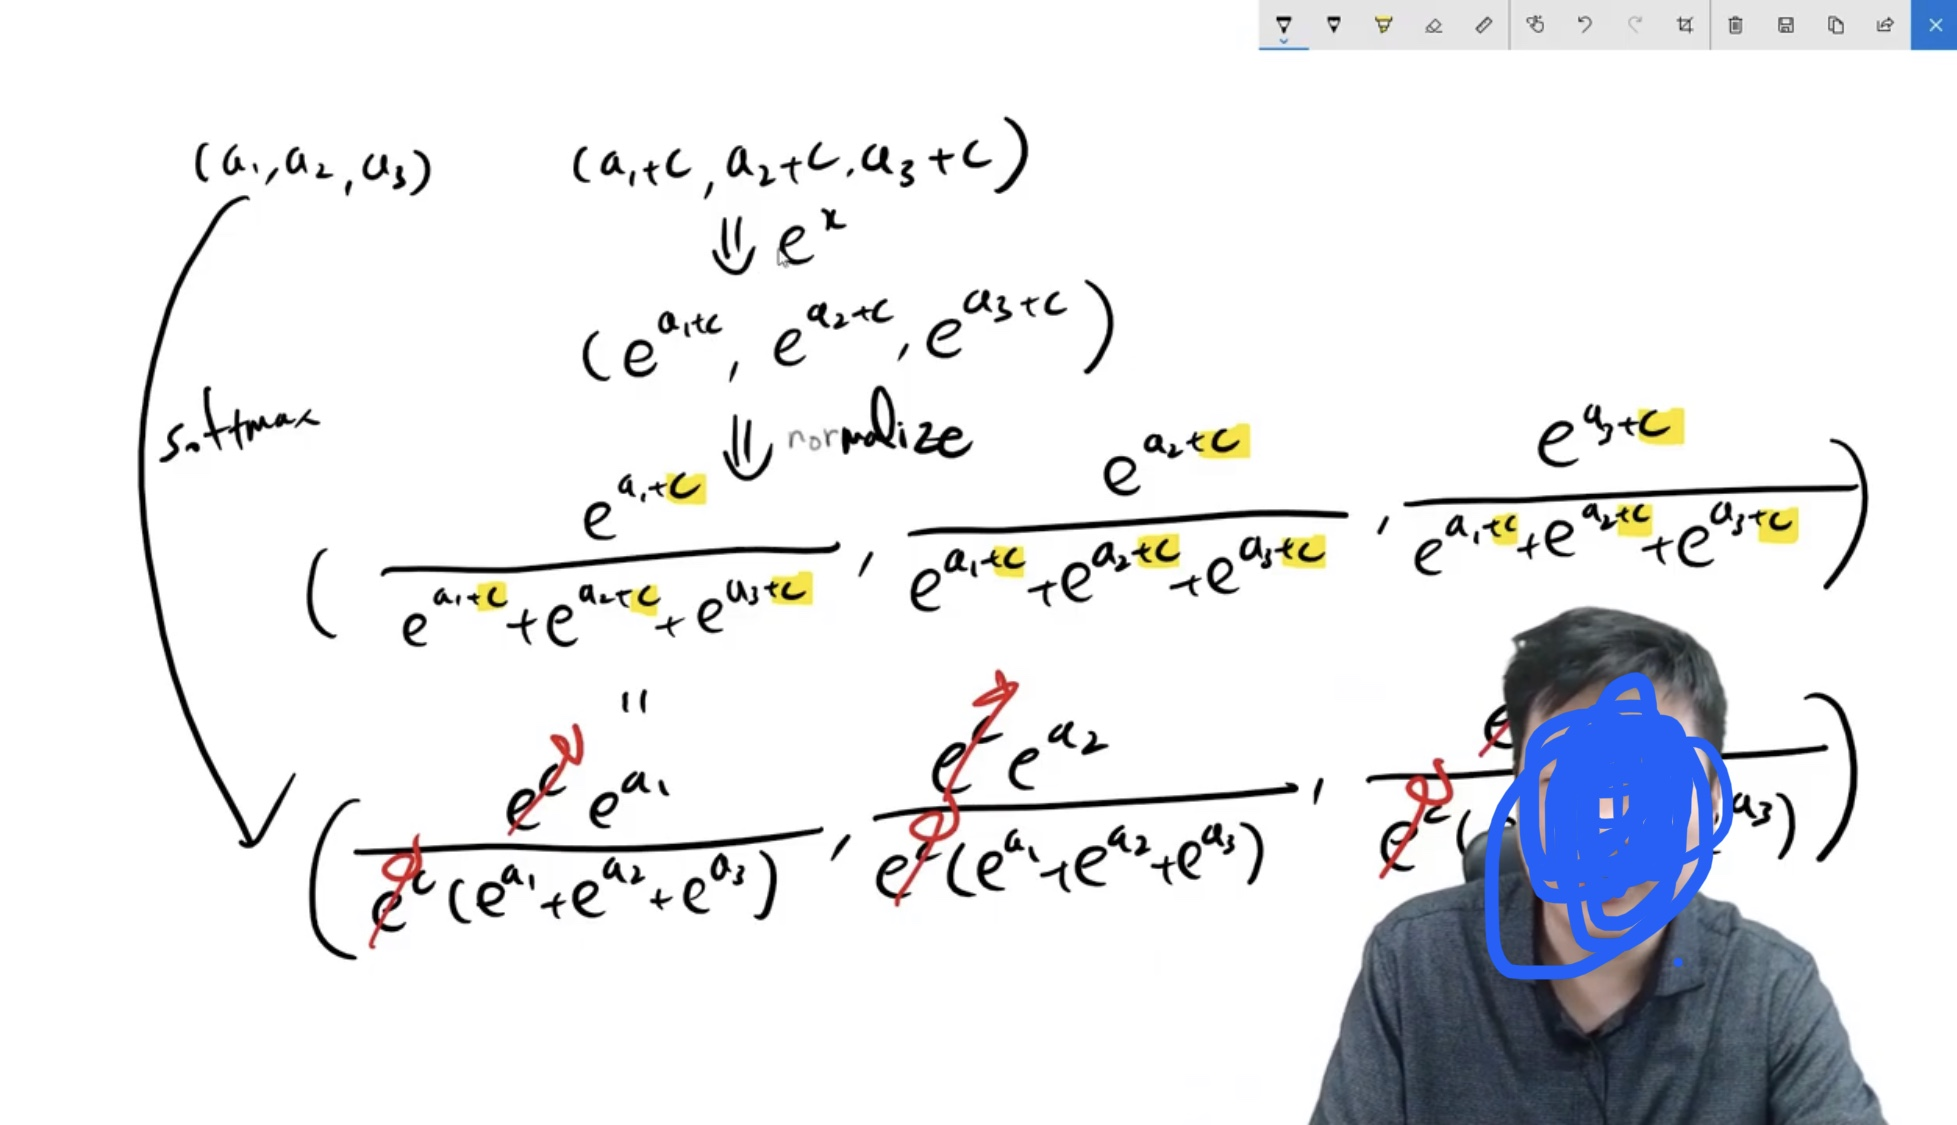

ndim = number of dimnesion

  1차원(벡터)=>0,

  2차원(행렬)=>1, 
  
  3차원(텐서)=>2

In [ ]:
def softmax(x):
  if x.ndim ==2: #ndim = number of dimnesion => x
    x = x.T
    x = x - np.max(x, axis=0) #벡터에서 스칼라 빼줌
    y = np.exp(x) / np.sum(np.exp(x), axis=0) 
    #numpy.exp() 함수는 밑이 자연상수 e인 지수함수(e^x)로 변환
    return y.T #y를 Transposition함
  x =  x - np.max(x) #오버플로우 대첵
  return np.exp(x)/np.sum(np.exp(x))

인공지능 신경망 층이 쌓일수록 아래와 같이 계속 반복

Affine -> Sigmoid -> Affine -> Sigmoid -> Affine -> Softmax

입력받을 때 Affine

값을 받을 때 Sigmoid

최종 결과 추출 Softmax => 확률 벡터로 변환